<a href="https://colab.research.google.com/github/laiyungseng/Tutorial3/blob/main/Tutorial_3_Deep_Learning.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#Installing kaggle and download dataset


In [1]:
%%capture
!pip install kaggle
!pip install statsmodels
!pip install scikit-learn

In [ ]:
#download kaggle.json from google drive
from google.colab import files, drive
drive.mount("/content/drive")


Mounted at /content/drive


In [ ]:
!rm /root/.kaggle
!mkdir /root/.kaggle
!cp /content/drive/MyDrive/KaggleAPI/kaggle.json /root/.kaggle
#print(f"Done moving kaggle.json to /root/.kaggle")
!chmod 600 /root/.kaggle/kaggle.json


rm: cannot remove '/root/.kaggle': No such file or directory


In [ ]:
#@title download dataset from kaggle dataset
#!/bin/bash
!kaggle datasets download nicholasjhana/energy-consumption-generation-prices-and-weather --force

Dataset URL: https://www.kaggle.com/datasets/nicholasjhana/energy-consumption-generation-prices-and-weather
License(s): CC0-1.0
  0% 0.00/3.81M [00:00<?, ?B/s]
100% 3.81M/3.81M [00:00<00:00, 503MB/s]


In [ ]:
!unzip energy-consumption-generation-prices-and-weather.zip

Archive:  energy-consumption-generation-prices-and-weather.zip
  inflating: energy_dataset.csv      
  inflating: weather_features.csv    


#Importing Library

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

#Data Preprocessing

In [ ]:
energy_pd = pd.read_csv('/content/energy_dataset.csv')

In [ ]:
energy_pd.isnull().sum()

,0
time,0
generation biomass,19
generation fossil brown coal/lignite,18
generation fossil coal-derived gas,18
generation fossil gas,18
generation fossil hard coal,18
generation fossil oil,19
generation fossil oil shale,18
generation fossil peat,18
generation geothermal,18


In [ ]:
energy_pd_clean=energy_pd.copy()

In [ ]:
energy_pd_clean.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil coal-derived gas,generation fossil gas,generation fossil hard coal,generation fossil oil,generation fossil oil shale,generation fossil peat,generation geothermal,generation hydro pumped storage aggregated,...,generation waste,generation wind offshore,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35045.000000,35046.000000,35046.0,35046.000000,35046.000000,35045.000000,35046.0,35046.0,35046.0,0.0,...,35045.000000,35046.0,35046.000000,35064.000000,0.0,35064.000000,35064.000000,35028.000000,35064.000000,35064.000000
mean,383.513540,448.059208,0.0,5622.737488,4256.065742,298.319789,0.0,0.0,0.0,NaN,...,269.452133,0.0,5464.479769,1439.066735,NaN,5471.216689,28712.129962,28696.939905,49.874341,57.884023
std,85.353943,354.568590,0.0,2201.830478,1961.601013,52.520673,0.0,0.0,0.0,NaN,...,50.195536,0.0,3213.691587,1677.703355,NaN,3176.312853,4594.100854,4574.987950,14.618900,14.204083
min,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,0.0,0.0,0.0,NaN,...,0.000000,0.0,0.000000,0.000000,NaN,237.000000,18105.000000,18041.000000,2.060000,9.330000
25%,333.000000,0.000000,0.0,4126.000000,2527.000000,263.000000,0.0,0.0,0.0,NaN,...,240.000000,0.0,2933.000000,69.000000,NaN,2979.000000,24793.750000,24807.750000,41.490000,49.347500
50%,367.000000,509.000000,0.0,4969.000000,4474.000000,300.000000,0.0,0.0,0.0,NaN,...,279.000000,0.0,4849.000000,576.000000,NaN,4855.000000,28906.000000,28901.000000,50.520000,58.020000
75%,433.000000,757.000000,0.0,6429.000000,5838.750000,330.000000,0.0,0.0,0.0,NaN,...,310.000000,0.0,7398.000000,2636.000000,NaN,7353.000000,32263.250000,32192.000000,60.530000,68.010000
max,592.000000,999.000000,0.0,20034.000000,8359.000000,449.000000,0.0,0.0,0.0,NaN,...,357.000000,0.0,17436.000000,5836.000000,NaN,17430.000000,41390.000000,41015.000000,101.990000,116.800000


In [ ]:
energy_pd_clean=energy_pd_clean.drop(columns='time')

In [ ]:
del_col= []
for x in energy_pd_clean:
  if energy_pd_clean[x].mean() == 0:
    del_col.append(x)
    energy_pd_clean = energy_pd_clean.drop(columns=[x])

print(del_col)

['generation fossil coal-derived gas', 'generation fossil oil shale', 'generation fossil peat', 'generation geothermal', 'generation marine', 'generation wind offshore']


In [ ]:
energy_pd_clean.isnull().sum()

,0
generation biomass,19
generation fossil brown coal/lignite,18
generation fossil gas,18
generation fossil hard coal,18
generation fossil oil,19
generation hydro pumped storage aggregated,35064
generation hydro pumped storage consumption,19
generation hydro run-of-river and poundage,19
generation hydro water reservoir,18
generation nuclear,17


In [ ]:
for x in energy_pd_clean:
  #check complete empty dataset
  if energy_pd_clean[x].isnull().sum() == len(energy_pd_clean):
    energy_pd_clean = energy_pd_clean.drop(columns=x)
  elif energy_pd_clean[x].isnull().sum() <= 100:
    energy_pd_clean = energy_pd_clean.fillna(energy_pd_clean[x].mean()) #fill na with mean value

In [ ]:
energy_pd_clean.isnull().sum()

,0
generation biomass,0
generation fossil brown coal/lignite,0
generation fossil gas,0
generation fossil hard coal,0
generation fossil oil,0
generation hydro pumped storage aggregated,0
generation hydro pumped storage consumption,0
generation hydro run-of-river and poundage,0
generation hydro water reservoir,0
generation nuclear,0


In [ ]:
#check dataset after clean
energy_pd_clean.describe()

,generation biomass,generation fossil brown coal/lignite,generation fossil gas,generation fossil hard coal,generation fossil oil,generation hydro pumped storage aggregated,generation hydro pumped storage consumption,generation hydro run-of-river and poundage,generation hydro water reservoir,generation nuclear,...,generation solar,generation waste,generation wind onshore,forecast solar day ahead,forecast wind offshore eday ahead,forecast wind onshore day ahead,total load forecast,total load actual,price day ahead,price actual
count,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000,3.506400e+04,35064.000000,35064.000000,35064.000000,35064.000000,...,35064.000000,35064.000000,35064.000000,35064.000000,3.506400e+04,35064.000000,35064.000000,35064.000000,35064.000000,35064.000000
mean,383.513540,448.026074,5620.047948,4254.077779,298.365952,3.835135e+02,475.527457,971.797164,2603.974283,6261.056061,...,1432.127346,269.513939,5461.871471,1439.066735,3.835135e+02,5471.216689,28712.129962,28667.870679,49.874341,57.884023
std,85.330814,354.480583,2204.462047,1963.058313,52.543859,1.374493e-10,792.194787,400.903018,1835.418624,849.386642,...,1679.856688,50.252090,3214.927366,1677.703355,1.374493e-10,3176.312853,4594.100854,4661.679174,14.618900,14.204083
min,0.000000,0.000000,0.000000,0.000000,0.000000,3.835135e+02,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,3.835135e+02,237.000000,18105.000000,383.513540,2.060000,9.330000
25%,333.000000,0.000000,4125.000000,2524.750000,263.000000,3.835135e+02,0.000000,637.000000,1076.000000,5757.000000,...,71.000000,240.000000,2930.750000,69.000000,3.835135e+02,2979.000000,24793.750000,24800.000000,41.490000,49.347500
50%,367.000000,509.000000,4968.000000,4473.000000,300.000000,3.835135e+02,68.000000,905.000000,2163.000000,6563.500000,...,615.000000,279.000000,4847.000000,576.000000,3.835135e+02,4855.000000,28906.000000,28894.000000,50.520000,58.020000
75%,433.000000,757.000000,6428.000000,5837.000000,330.000000,3.835135e+02,615.000000,1250.000000,3756.250000,7024.000000,...,2575.250000,310.000000,7397.000000,2636.000000,3.835135e+02,7353.000000,32263.250000,32186.250000,60.530000,68.010000
max,592.000000,999.000000,20034.000000,8359.000000,449.000000,3.835135e+02,4523.000000,2000.000000,9728.000000,7117.000000,...,5792.000000,383.513540,17436.000000,5836.000000,3.835135e+02,17430.000000,41390.000000,41015.000000,101.990000,116.800000


#Apply EDA

In [ ]:
energy_pd_clean = pd.concat([energy_pd_clean, energy_pd['time']], axis=1)

In [ ]:
energy_pd_clean['time'] = pd.to_datetime(energy_pd_clean['time'])

/tmp/ipython-input-18-4076640682.py:1: FutureWarning: In a future version of pandas, parsing datetimes with mixed time zones will raise an error unless `utc=True`. Please specify `utc=True` to opt in to the new behaviour and silence this warning. To create a `Series` with mixed offsets and `object` dtype, please use `apply` and `datetime.datetime.strptime`
  energy_pd_clean['time'] = pd.to_datetime(energy_pd_clean['time'])


In [ ]:
#set time as index
energy_pd_clean = energy_pd_clean.set_index('time')

In [ ]:
energy_pd_clean.index

Index([2015-01-01 00:00:00+01:00, 2015-01-01 01:00:00+01:00,
       2015-01-01 02:00:00+01:00, 2015-01-01 03:00:00+01:00,
       2015-01-01 04:00:00+01:00, 2015-01-01 05:00:00+01:00,
       2015-01-01 06:00:00+01:00, 2015-01-01 07:00:00+01:00,
       2015-01-01 08:00:00+01:00, 2015-01-01 09:00:00+01:00,
       ...
       2018-12-31 14:00:00+01:00, 2018-12-31 15:00:00+01:00,
       2018-12-31 16:00:00+01:00, 2018-12-31 17:00:00+01:00,
       2018-12-31 18:00:00+01:00, 2018-12-31 19:00:00+01:00,
       2018-12-31 20:00:00+01:00, 2018-12-31 21:00:00+01:00,
       2018-12-31 22:00:00+01:00, 2018-12-31 23:00:00+01:00],
      dtype='object', name='time', length=35064)

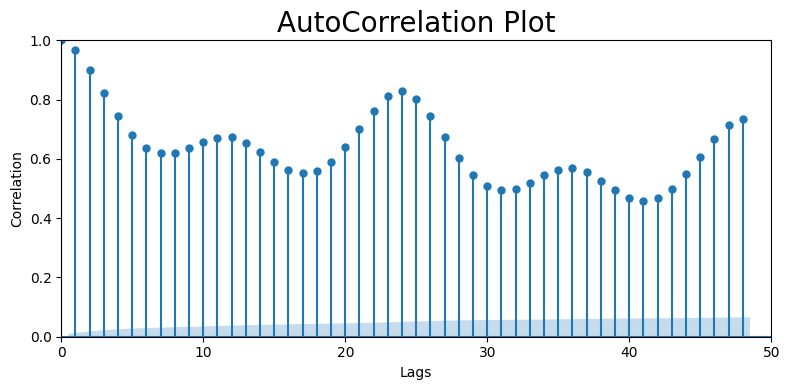

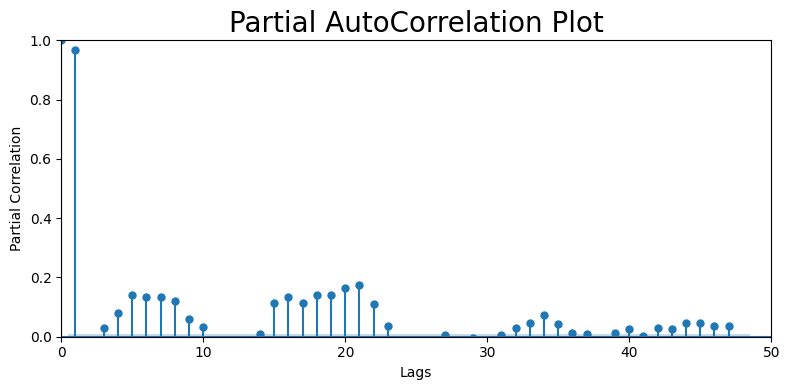

In [ ]:
#ACF plot
plt.rc("figure", figsize=(8,4))
plot_acf(energy_pd_clean['price actual'], lags=48)
plt.ylabel("Correlation")
plt.ylim(0,1)
plt.xlabel("Lags")
plt.xlim(0,50)
plt.title('AutoCorrelation Plot', fontsize=20)
plt.tight_layout()

#PACF plot
plt.rc("figure", figsize=(8,4))
plot_pacf(energy_pd_clean['price actual'], lags=48, method="ywm")
plt.ylabel("Partial Correlation")
plt.ylim(0,1)
plt.xlabel("Lags")
plt.xlim(0,50)
plt.title('Partial AutoCorrelation Plot', fontsize=20)
plt.tight_layout()
plt.show()

Obervation in ACF plot:
1. Lag 0 at 1.0 presenting a perfect correlation with itself -standard baseline

2. lag 1 to 10 show moderately strong autocorrelation, indicating short-term persistence: recent past values have a measurable influences.

3. Visible fluctuations and small peaks beyond lag 10 hint at potential periodic structure- daily cycles if it's hourly energy pricing.

4. The slow decay pattern suggest non-random structure with possible long-range dependencies

5. No abrupt cutoff reinforces that the data doesn't behave like a pure white noise process -it carries temporal signal worth modeling.

Observation in PACF plot:
1. A significant spikes show in lag 1, indicate that this lag is important in modeling the underlying data.
2. Lags 3-4 shows a meaning spike, eventhough smaller but it still hold direct predictive value beyond lag 1
3. lags 1 to 4 can be consider as engineered features, since these signal processing meaning signal.

In [ ]:
# create lagged features for price actual up to lag 4
for lag in range(1,5):
  energy_pd_clean[f'price_actual_lag_{lag}'] = energy_pd_clean['price actual'].shift(lag)

In [ ]:
#shifting time index create zero value, hence cleaning required
energy_pd_clean.dropna(subset=[f'price_actual_lag_{i}' for i in range(1,5)], inplace=True)

In [ ]:
#Smooth noise or capture trends
energy_pd_clean['rolling_mean_3'] =energy_pd_clean['price actual'].rolling(window=3).mean().shift(1)
energy_pd_clean['rolling_std_3'] =energy_pd_clean['price actual'].rolling(window=3).std().shift(1)

In [ ]:
energy_pd_clean.dropna(subset=['rolling_mean_3', 'rolling_std_3'], inplace=True)

## Training dataset in XGBoost

In [ ]:
# feed the data to XGBOSST
feature_cols = [col for col in energy_pd_clean.columns if 'lag' in col or 'rolling' in col or col in ['hour', 'year']]
X = energy_pd_clean[feature_cols]
y = energy_pd_clean['price actual']


In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [ ]:
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
model = XGBRegressor(
    n_estimators = 100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42
)
model.fit(X_train, y_train)
y_predXG = model.predict(X_test)

##Evaluation metrics
XG_RMSE = np.sqrt(mean_squared_error(y_test, y_predXG))
XG_MAE = mean_absolute_error(y_test, y_predXG)
XG_R2 = r2_score(y_test, y_predXG)

#show metrics result
print(f"XG Root Mean Square Error: {XG_RMSE}")
print(f"XG_ Mean Squared Error: {XG_MAE}")
print(f'XG_R2 score:{XG_R2}')

XG Root Mean Square Error: 3.0198626938915285
XG_ Mean Squared Error: 2.1020398661291946
XG_R2 score:0.95430069400541


###Verifying important variances

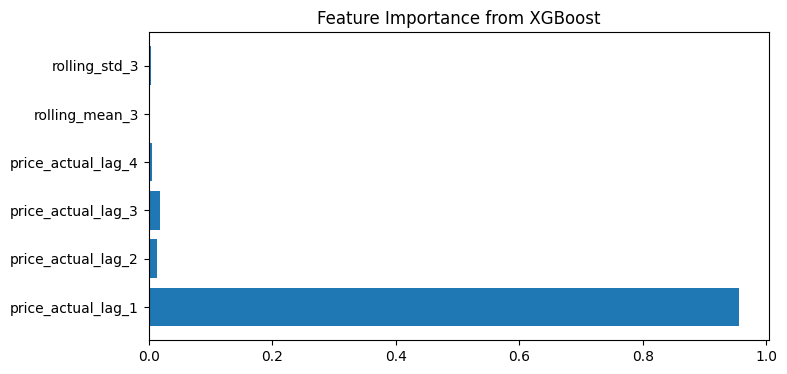

In [ ]:
#showing Feature important
importance=model.feature_importances_
plt.barh(feature_cols,importance)
plt.title("Feature Importance from XGBoost")
plt.show()

###Analyze with time-series split

Fold 1
CV Root Mean Square Error: 3.8796870897052873
CV_ Mean Squared Error: 2.93793335803279
CV_R2 score:0.941871521879076
Fold 2
CV Root Mean Square Error: 2.735857551469706
CV_ Mean Squared Error: 2.029673709915093
CV_R2 score:0.9515282574664232
Fold 3
CV Root Mean Square Error: 3.6228909845052613
CV_ Mean Squared Error: 2.2569394883518554
CV_R2 score:0.9127910180496143
Fold 4
CV Root Mean Square Error: 3.404374002129203
CV_ Mean Squared Error: 2.306274763797498
CV_R2 score:0.9322685713545101
Fold 5
CV Root Mean Square Error: 2.4185154664267987
CV_ Mean Squared Error: 1.7035865775725076
CV_R2 score:0.9161552669132218


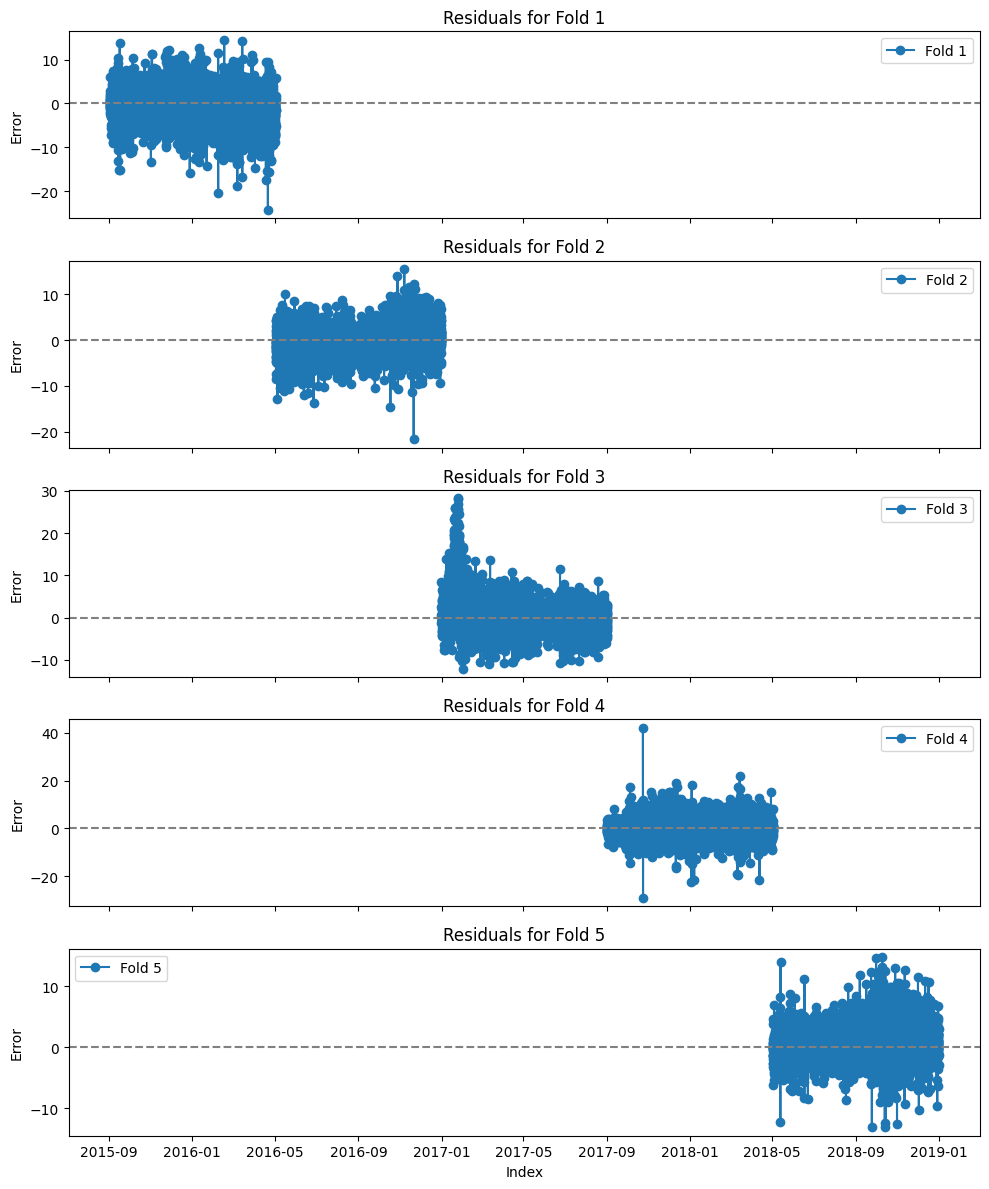

In [ ]:
##cross validaion by timeseriesSplit
from sklearn.model_selection import TimeSeriesSplit
error_metrics = []
tscv = TimeSeriesSplit(n_splits=5)
fig, axs = plt.subplots(tscv.get_n_splits(), figsize=(10,12), sharex=True)
for i,( train_idx, test_idx) in enumerate(tscv.split(X)):
  X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
  y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

  model_cv = XGBRegressor(
      n_estimators = 100,
      max_depth=4,
      learning_rate=0.1,
      random_state=42
  )
  model_cv.fit(X_train_cv, y_train_cv)
  y_pred_cv = model_cv.predict(X_test_cv)
  residuals =y_test_cv - y_pred_cv

  axs[i].plot(y_test_cv.index, residuals, marker='o', linestyle='-',label=f'Fold {i+1}')
  axs[i].axhline(0, color='gray', linestyle = '--')
  axs[i].set_title(f'Residuals for Fold {i+1}')
  axs[i].set_ylabel('Error')
  axs[i].legend()


  ##Evaluation Metrics
  CV_RMSE = np.sqrt(mean_squared_error(y_test_cv, y_pred_cv))
  CV_MAE = mean_absolute_error(y_test_cv, y_pred_cv)
  CV_R2 = r2_score(y_test_cv, y_pred_cv)
  error_metrics.append([CV_RMSE, CV_MAE, CV_R2])
  print(f"Fold {i+1}")
  print(f"CV Root Mean Square Error: {CV_RMSE}")
  print(f"CV_ Mean Squared Error: {CV_MAE}")
  print(f'CV_R2 score:{CV_R2}')
plt.xlabel('Index')
plt.tight_layout()
plt.show()

Based on the result from the evaluation and residuals plot.

the observation from the timeseriesSplit present a higly consistent RMSE where the value are in between 2.4 to 3.8, this range shows that no outliers presented in the results which also suggest model stability across different time segments.

Strong R2 scores in presented in the results as 0.96, this shows that a 95% of variance are included in the each folds.

furthermore, Fold 2 and 5 performed best overall (lowest RMSE, highest R2) which could suggest those time windows are more predictable or exhibit less noise

Fold 3 lags has a slightly less R2 and RMSE, this might be shows the period has an unexpected volatility or missing signals.

###Visualize performance

Visualize Fold-level performance

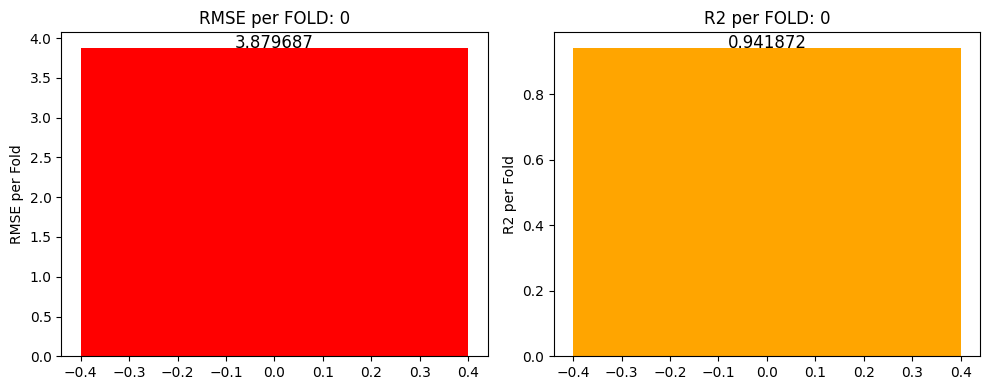

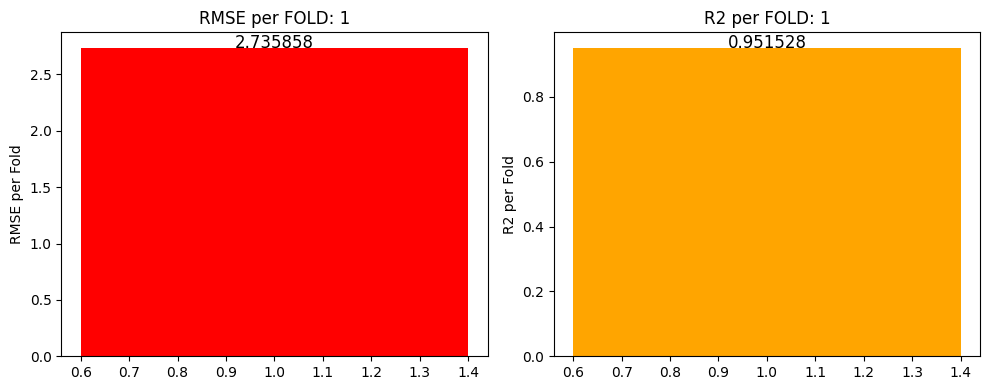

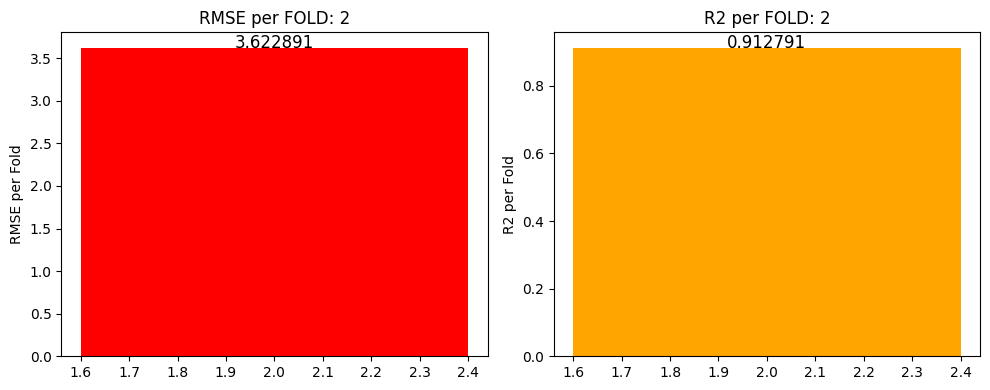

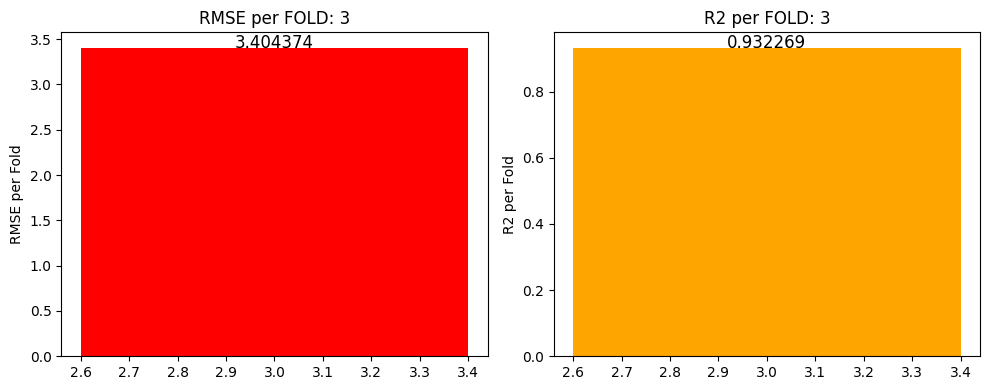

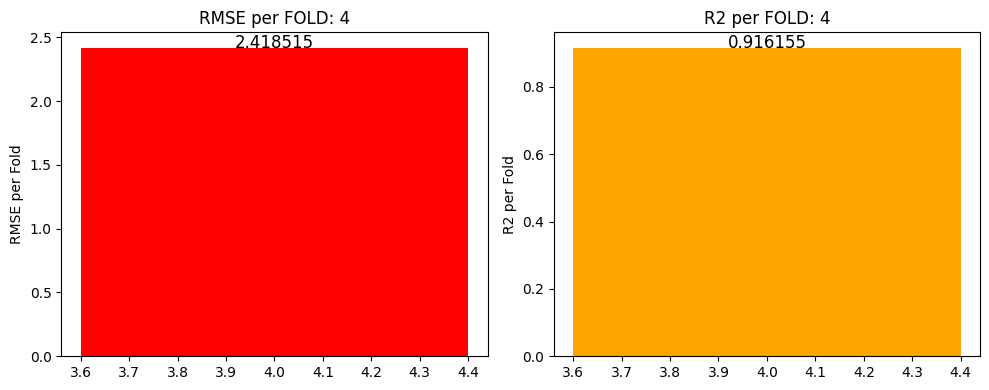

In [ ]:
for i, x in enumerate(error_metrics):
  plt.figure(figsize=(10,4))
  plt.subplot(1,2,1)
  plt.bar(i, x[0], color='red')
  plt.text(i,x[0], f'{x[0]:2f}', ha='center', fontsize=12)
  plt.title(f'RMSE per FOLD: {i}')
  plt.ylabel('RMSE per Fold')

  plt.subplot(1,2,2)
  plt.bar(i, x[2], color='orange')
  plt.text(i,x[2], f'{x[2]:2f}', ha='center', fontsize=12)
  plt.title(f'R2 per FOLD: {i}')
  plt.ylabel('R2 per Fold')
  plt.tight_layout()
plt.show()

Residual Density or Distribution Check

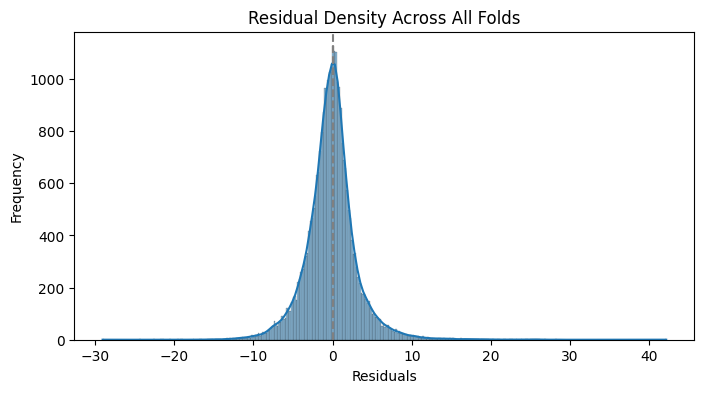

In [ ]:
residual_all = []
for train_idx, test_idx in TimeSeriesSplit(n_splits=5).split(X):
  X_train_cv, X_test_cv = X.iloc[train_idx], X.iloc[test_idx]
  y_train_cv, y_test_cv = y.iloc[train_idx], y.iloc[test_idx]

  model_cv = XGBRegressor(
      n_estimators = 100,
      max_depth=4,
      learning_rate=0.1,
      random_state=42
  )
  model_cv.fit(X_train_cv, y_train_cv)
  y_pred_cv = model_cv.predict(X_test_cv)
  fold_residual =y_test_cv - y_pred_cv
  residual_all.extend(fold_residual)
sns.histplot(residual_all, kde=True)
plt.title('Residual Density Across All Folds')
plt.xlabel('Residuals')
plt.ylabel('Frequency')
plt.axvline(0, color='gray', linestyle='--')
plt.show()

Observation from residual Density shows a high concentration of frequency are surrounding around zero, this shows that the model's calibration is solid.

###Persistence Baseline Evaluation

Compare with persistence Baseline

In [ ]:
y_pred_persistence = X['price_actual_lag_1']

#Evaluate performance on persistence dataset
RMSE_P = np.sqrt(mean_squared_error(y, y_pred_persistence))
MAE_P = mean_absolute_error(y, y_pred_persistence)
R2_P = r2_score(y, y_pred_persistence)

print(f"Persistence Root Mean Square Error: {RMSE_P}")
print(f"Persistence_ Mean Squared Error: {MAE_P}")
print(f'Persistence_R2 score:{R2_P}')

Persistence Root Mean Square Error: 3.6607556066167213
Persistence_ Mean Squared Error: 2.5214527769061816
Persistence_R2 score:0.9335869099072698


###Create price trend prediction

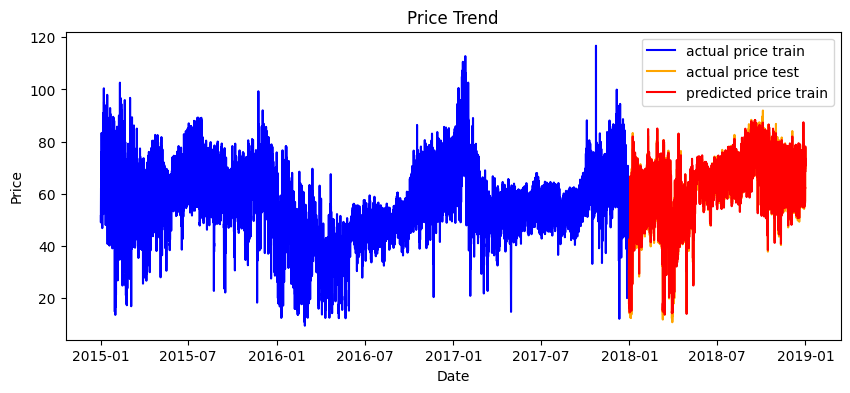

Train Root Mean Square Error: 2.6376935703873134
Train_ Mean Squared Error: 1.8219098353828398
Train_R2 score:0.9543790925826244


In [ ]:
#split dataset by dateindex
cutoff = pd.to_datetime('2017-12-31',utc=True)
train1 = energy_pd_clean.loc[:cutoff]
test1 = energy_pd_clean.loc[cutoff:]

#clean train data
X_train1 = train1.drop(columns='price actual')
y_train1 = train1['price actual']
X_test1 = test1.drop(columns='price actual')
y_test1 = test1['price actual']
#training in XGboost with split time index
model_train = XGBRegressor(
    n_estimators = 100,
    max_depth=4,
    learning_rate=0.1,
    random_state=42
)
model_train.fit(X_train1, y_train1)
trainypred = model_train.predict(X_test1)
plt.figure(figsize=(10,4))
plt.plot(X_train1.index, y_train1, label='actual price train', color='blue')
plt.plot(X_test1.index, y_test1, label='actual price test', color='orange')
plt.plot(X_test1.index, trainypred, label='predicted price train', color='red')
plt.title('Price Trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()


##evaluation metrics
train_RMSE = np.sqrt(mean_squared_error(y_test1, trainypred))
train_MAE = mean_absolute_error(y_test1, trainypred)
train_R2 = r2_score(y_test1, trainypred)

print(f"Train Root Mean Square Error: {train_RMSE}")
print(f"Train_ Mean Squared Error: {train_MAE}")
print(f'Train_R2 score:{train_R2}')

##Metrics table

Create table to cross evaluate on the evaluation results

In [ ]:
metrics = pd.DataFrame({
    'Model': ['XGBoost','XGBoost with datetime split','Persistence Baseline','Fold 1','Fold 2','Fold 3','Fold 4','Fold 5'],
    'RMSE': [XG_RMSE, train_RMSE ,RMSE_P, error_metrics[0][0], error_metrics[1][0], error_metrics[2][0], error_metrics[3][0], error_metrics[4][0]],
    'MAE': [XG_MAE,train_MAE, MAE_P, error_metrics[0][1], error_metrics[1][1], error_metrics[2][1], error_metrics[3][1], error_metrics[4][1]],
    'R2': [XG_R2, train_R2,R2_P, error_metrics[0][2], error_metrics[1][2], error_metrics[2][2], error_metrics[3][2], error_metrics[4][2]],
})

styletable=metrics.style.set_caption("Model Evaluation Metrics").format(precision=3)\
.set_properties(subset=['Model'], **{'text-align': 'right'})\
.set_properties(subset=[ 'RMSE', 'MAE', 'R2'], **{'text-align': 'center'})

#Print table
styletable


,Model,RMSE,MAE,R2
0,XGBoost,3.020,2.102,0.954
1,XGBoost with datetime split,2.638,1.822,0.954
2,Persistence Baseline,3.661,2.521,0.934
3,Fold 1,3.880,2.938,0.942
4,Fold 2,2.736,2.030,0.952
5,Fold 3,3.623,2.257,0.913
6,Fold 4,3.404,2.306,0.932
7,Fold 5,2.419,1.704,0.916


#Forecasting Model

In [ ]:
#create data with step ahead
for step in range(1,4):
  energy_pd_clean[f'target_t+{step}'] = energy_pd_clean['price actual'].shift(-step)

In [ ]:
energy_pd_clean.dropna(subset=[f'target_t+{i}' for i in range(1,4)], inplace=True)

Multi-output forecasting

In [ ]:
target_col = [f'target_t+{i}' for i in range(1,4)]
lag_col = [f'price_actual_lag_{i}' for i in range(1,5)]

increase the window of price

In [ ]:
Windows = [24,72,168] #hourly rolling windows: 1day, 3day, 7day

for window in Windows:
  energy_pd_clean[f'roll_mean_{window}'] = energy_pd_clean['price actual'].rolling(window=window).mean()
  energy_pd_clean[f'roll_std_{window}'] = energy_pd_clean['price actual'].rolling(window=window).std()
  energy_pd_clean[f'roll_min_{window}'] = energy_pd_clean['price actual'].rolling(window=window).min()
  energy_pd_clean[f'roll_max_{window}'] = energy_pd_clean['price actual'].rolling(window=window).max()


In [ ]:
#drop na in the dataframe
energy_pd_clean.dropna(subset=[f'roll_{stat}_{window}' for window in Windows for stat in ['mean', 'std', 'min', 'max']], inplace=True)

In [ ]:
rolling_features = [f'roll_{stat}_{window}' for window in Windows for stat in ['mean', 'std', 'min', 'max']]
X1 = energy_pd_clean.drop(columns=['price actual']+target_col)
Y1 = energy_pd_clean[['price actual']+target_col]

MultioutputRegressor

In [ ]:
X_train2, X_test2, y_train2, y_test2 = train_test_split(X1, Y1, shuffle=False, test_size=0.2)
from sklearn.multioutput import MultiOutputRegressor

base_model = XGBRegressor(n_estimators=100, max_depth=4, learning_rate=0.1, random_state=42)
multi_model = MultiOutputRegressor(base_model)

multipred = multi_model.fit(X_train2, y_train2).predict(X_test2)


Features importances

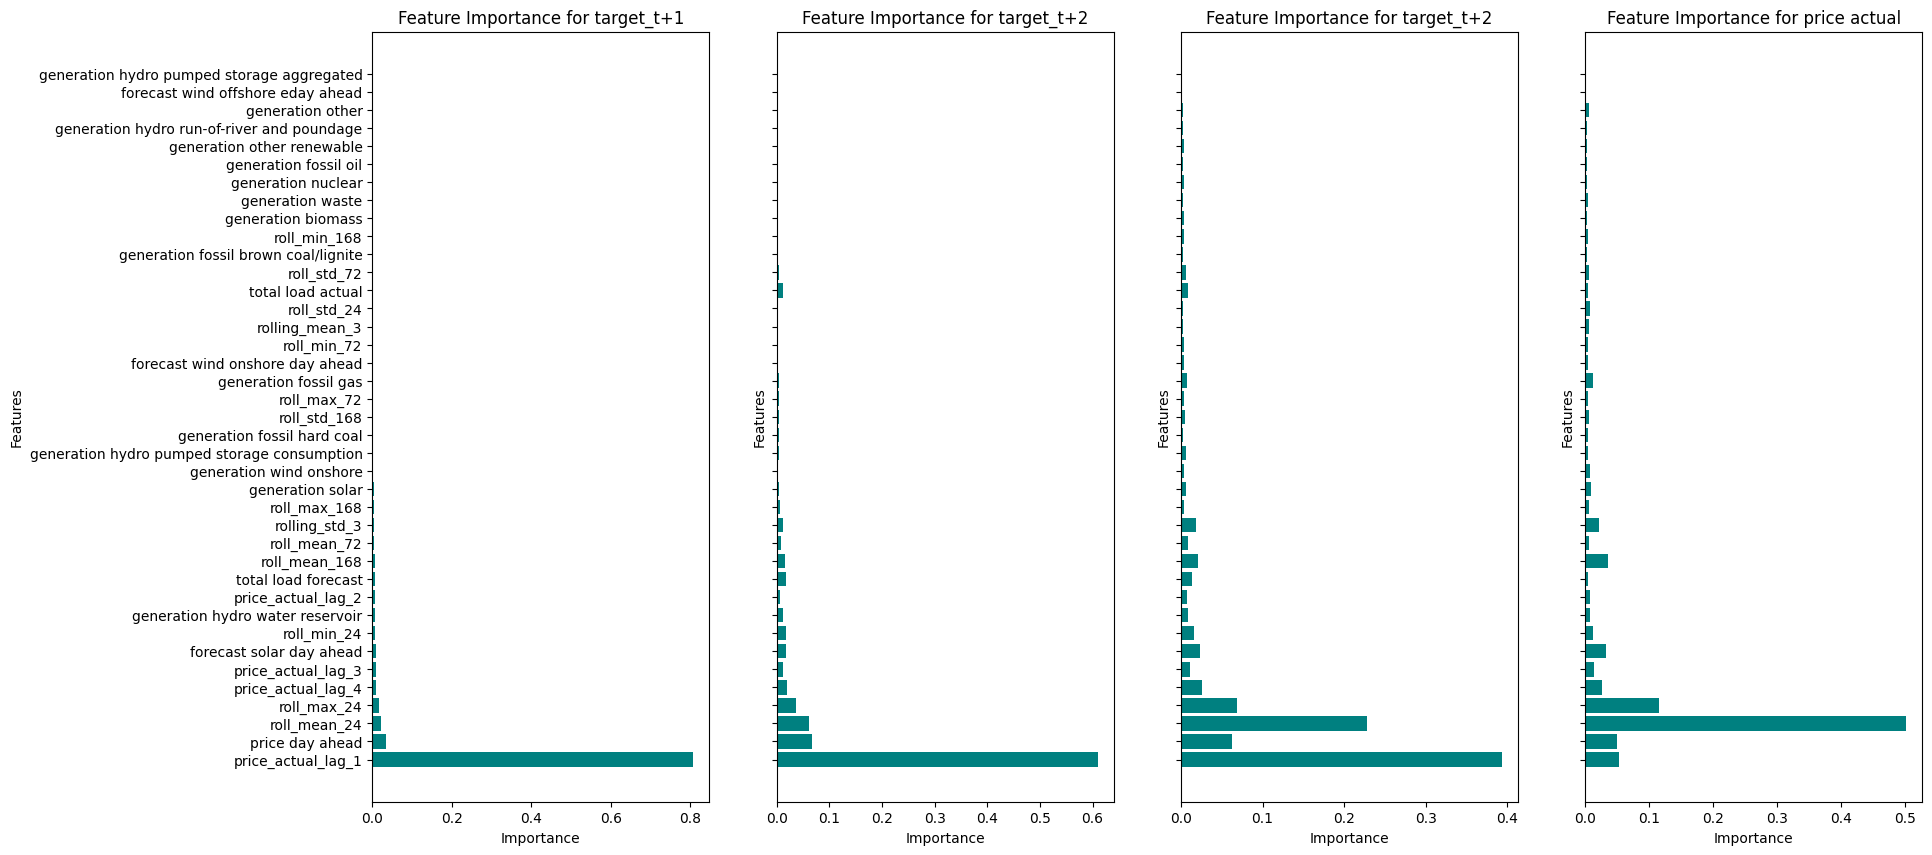

['price day ahead', 'price_actual_lag_1', 'roll_mean_24', 'roll_max_24']


In [ ]:
step = ['target_t+1','target_t+2','target_t+2', 'price actual']
features_col =X_train2.columns
models = multi_model.estimators_
reliable_feat=[]
fig, axs = plt.subplots(1,4, figsize=(20,10), sharey=True)
for i, model in enumerate(models):
  imp = model.feature_importances_
  sorted_idx = np.argsort(imp)[::-1]

  axs[i].barh(np.array(features_col)[sorted_idx], imp[sorted_idx], color='teal')
  axs[i].set_title(f'Feature Importance for {step[i]}')
  axs[i].set_xlabel('Importance')
  axs[i].set_ylabel('Features')
  reliable_feat.append(pd.Series(imp, index=X_train2.columns))

plt.show()
mean_importance = pd.concat(reliable_feat, axis=1).mean(axis=1)
selected_feats = mean_importance[mean_importance>0.05].index.tolist()

print(selected_feats)


Test Root Mean Square Error: 2.3544455091112497
Test_ Mean Squared Error: 1.7689005340768602
Test_R2 score:0.9579405067445838


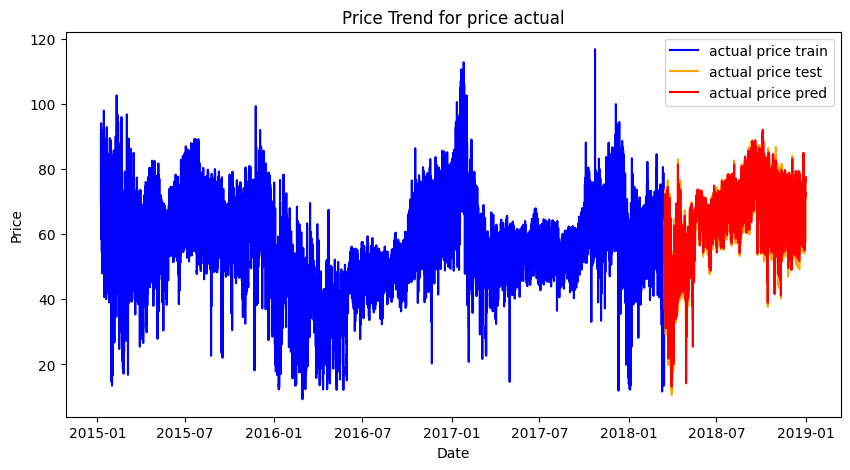

Test Root Mean Square Error: 3.833697360411744
Test_ Mean Squared Error: 2.876339857850932
Test_R2 score:0.888415820916294


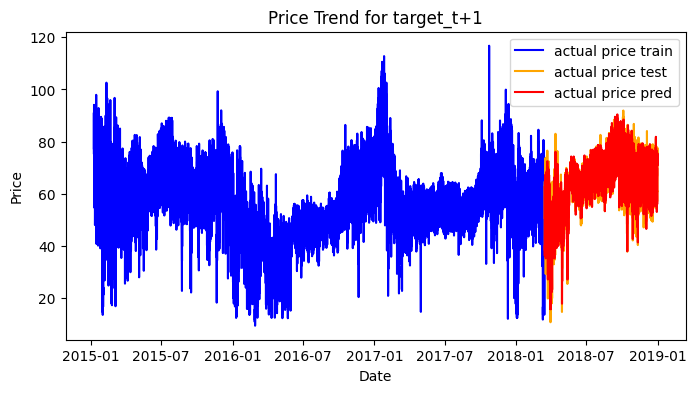

Test Root Mean Square Error: 5.025664216635779
Test_ Mean Squared Error: 3.7907290686259945
Test_R2 score:0.8080991157962206


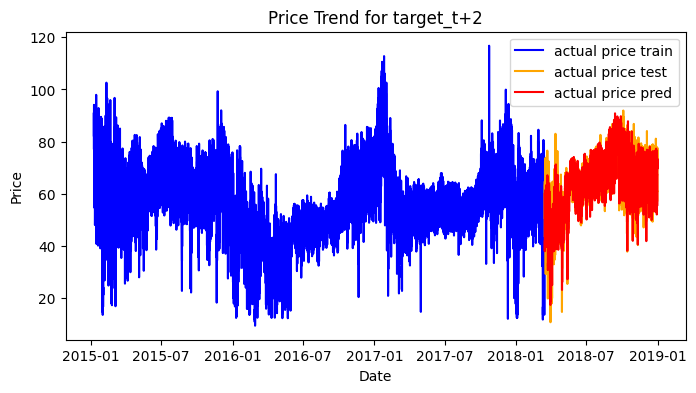

Test Root Mean Square Error: 5.859391675244344
Test_ Mean Squared Error: 4.475637466220741
Test_R2 score:0.7390244791690604


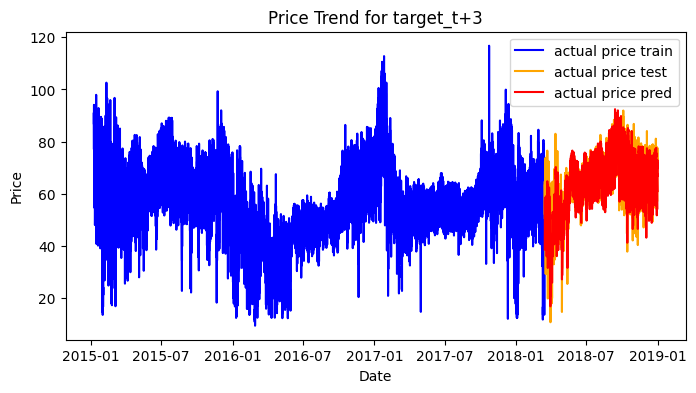

In [ ]:
#visual plot for multioutput
plt.figure(figsize=(10,5))
#fig, axs = plt.subplots(1,3, figsize=(15,3))
for i, target in enumerate(Y1.columns):
  plt.plot(X_train2.index, y_train2[target], label='actual price train', color='blue')
  plt.plot(X_test2.index, y_test2[target], label='actual price test', color='orange')
  plt.plot(X_test2.index, multipred[:,i], label='actual price pred', color='red')
  plt.title(f'Price Trend for {target}')
  plt.xlabel('Date')
  plt.ylabel('Price')
  plt.legend()
  #Evaluation metrics
  test_RMSE = np.sqrt(mean_squared_error(y_test2[target], multipred[:,i]))
  test_MAE = mean_absolute_error(y_test2[target], multipred[:,i])
  test_R2 = r2_score(y_test2[target], multipred[:,i])

  print(f"Test Root Mean Square Error: {test_RMSE}")
  print(f"Test_ Mean Squared Error: {test_MAE}")
  print(f"Test_R2 score:{test_R2}")

  plt.show()


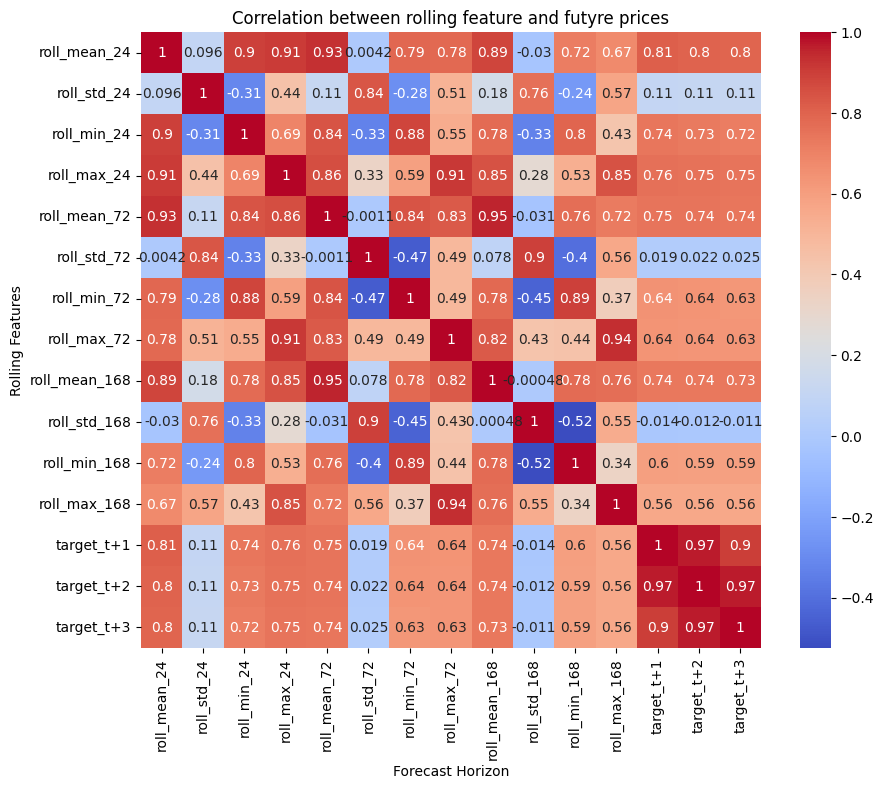

In [ ]:
correlation_df = energy_pd_clean[rolling_features + target_col]
corr_matrix = correlation_df.corr()
plt.figure(figsize=(10,8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation between rolling feature and futyre prices')
plt.xlabel('Forecast Horizon')
plt.ylabel('Rolling Features')
plt.show()

Based on the observation:

1. roll_mean_value has the highest influences on target, which roll mean with different timeframe has  a correlation of 0.7 and its more than roll_max, roll min and roll_std.

Quantify Feature Reliability

In [ ]:
#Threshold filter: keep only corr >0.5
threshold = 0.5
filter_corr = correlation_df.corr(numeric_only=True)
filter_corr = filter_corr[(filter_corr>threshold) & (filter_corr<1)]


In [ ]:
#split and filter feature in filter_corr
target_cols = [col for col in filter_corr if 'target'in col]
features_cols = [col for col in filter_corr if 'roll' in col]

In [ ]:
ff_cols = [col for target in target_cols for col in filter_corr[target].index if pd.notna(filter_corr[target][col])]

In [ ]:
A = set()
new_cols =[]
for col in ff_cols:
  if col not in A:
    A.add(col)
    new_cols.append(col)
new_feat_cols=[col for col in new_cols if 'roll' in col]

create future dataset

In [ ]:
energy_pd_clean.index

Index([2015-01-08 06:00:00+01:00, 2015-01-08 07:00:00+01:00,
       2015-01-08 08:00:00+01:00, 2015-01-08 09:00:00+01:00,
       2015-01-08 10:00:00+01:00, 2015-01-08 11:00:00+01:00,
       2015-01-08 12:00:00+01:00, 2015-01-08 13:00:00+01:00,
       2015-01-08 14:00:00+01:00, 2015-01-08 15:00:00+01:00,
       ...
       2018-12-31 11:00:00+01:00, 2018-12-31 12:00:00+01:00,
       2018-12-31 13:00:00+01:00, 2018-12-31 14:00:00+01:00,
       2018-12-31 15:00:00+01:00, 2018-12-31 16:00:00+01:00,
       2018-12-31 17:00:00+01:00, 2018-12-31 18:00:00+01:00,
       2018-12-31 19:00:00+01:00, 2018-12-31 20:00:00+01:00],
      dtype='object', name='time', length=34887)

##Forecast dataset preparation and simulation
Create future data use for prediction

In [ ]:
energy_pd_clean.index = pd.to_datetime(energy_pd_clean.index, utc=True)


In [ ]:
last_timestamp = energy_pd_clean.index[-1]
forecast_horizon = (24*60) # e.g. predict 48 future hours

future_time = pd.date_range(start=last_timestamp + pd.Timedelta(hours=1), periods=forecast_horizon,freq='h', tz='UTC')

future_df = pd.DataFrame(index=future_time)


In [ ]:
future_df['time'] = future_time
future_df= future_df.set_index('time')

In [ ]:
len(future_time)

1440

In [ ]:
future_df['hour'] =future_df.index.hour
future_df['dayofweek'] = future_df.index.dayofweek

In [ ]:
#propagate latest available features
latest_row = energy_pd_clean.iloc[-1]

for col in X_train1.columns:
 last_value = latest_row[col]
 random_vals =np.random.uniform(low=last_value*0.9, high=last_value*1.5, size=len(future_df))
 future_df[col] = random_vals


In [ ]:
#remove feature that not aligned in model_train
future_df_align = future_df[model_train.feature_names_in_]

In [ ]:
future_pred = model_train.predict(future_df_align)

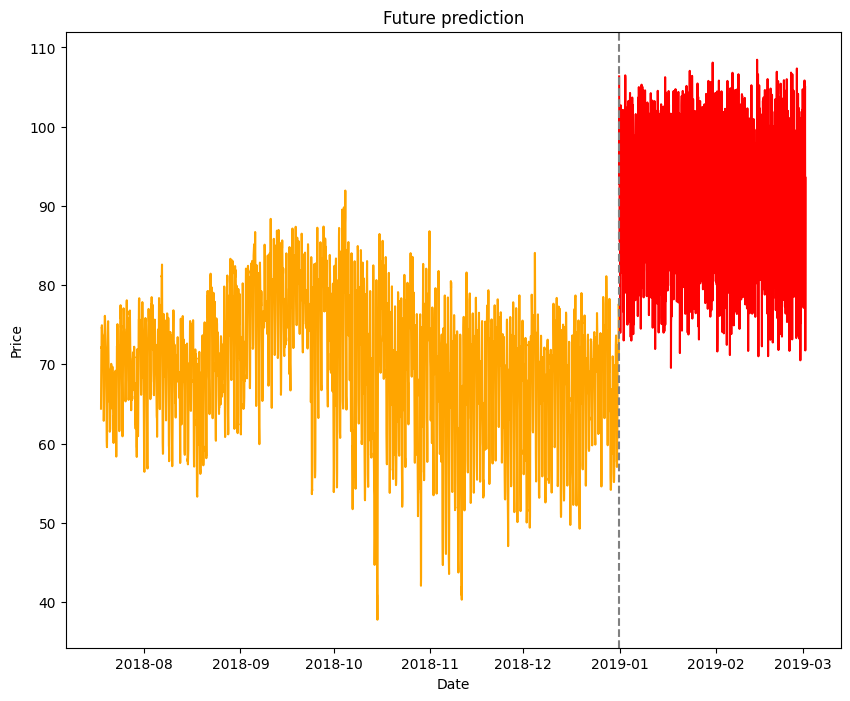

In [ ]:
#visualize plot
plt.figure(figsize=(10,8))
plt.plot(energy_pd_clean[len(energy_pd_clean)-4000:len(energy_pd_clean)].index, energy_pd_clean['price actual'][len(energy_pd_clean)-4000:len(energy_pd_clean)], label='original price', color='orange')
plt.plot(future_df.index, future_pred ,label='future pred',  color='red')
plt.axvline(x=last_timestamp, color='gray', linestyle='--')


plt.title('Future prediction')
plt.xlabel('Date')
plt.ylabel('Price')
plt.show()

#Deep Learning


##LTSM-datetime index split by hour

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense, Dropout, Bidirectional
from sklearn.preprocessing import MinMaxScaler

In [ ]:
scaler=MinMaxScaler()
X1_train = scaler.fit_transform(X_train1)
y1_train= scaler.fit_transform(y_train1.values.reshape(-1,1))
X1_test = scaler.fit_transform(X_test1)
y1_test = scaler.fit_transform(y_test1.values.reshape(-1,1))

In [ ]:
#build LSTM model
model= Sequential()
model.add(LSTM(50, activation='relu',return_sequences=True, input_shape=(X1_train.shape[1],1)))
model.add(Dropout(0.2))
model.add(LSTM(20))
model.add(Dense(32, activation='relu'))
model.add(Dense(1))
model.compile(optimizer='adam',loss='mse')
model.fit(X1_train,y1_train, epochs=10, verbose=1)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/rnn/rnn.py:200: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(**kwargs)


Epoch 1/10
822/822 ━━━━━━━━━━━━━━━━━━━━ 24s 23ms/step - loss: 0.0214
Epoch 2/10
822/822 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - loss: 0.0033
Epoch 3/10
822/822 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - loss: 0.0029
Epoch 4/10
822/822 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - loss: 0.0026
Epoch 5/10
822/822 ━━━━━━━━━━━━━━━━━━━━ 20s 25ms/step - loss: 0.0023
Epoch 6/10
822/822 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - loss: 0.0020
Epoch 7/10
822/822 ━━━━━━━━━━━━━━━━━━━━ 18s 22ms/step - loss: 0.0018
Epoch 8/10
822/822 ━━━━━━━━━━━━━━━━━━━━ 20s 24ms/step - loss: 0.0017
Epoch 9/10
822/822 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - loss: 0.0015
Epoch 10/10
822/822 ━━━━━━━━━━━━━━━━━━━━ 19s 23ms/step - loss: 0.0015


In [ ]:
lstm_pred=model.predict(X1_test)

275/275 ━━━━━━━━━━━━━━━━━━━━ 6s 8ms/step


In [ ]:
#revert scaling
lstm_pred1=scaler.inverse_transform(lstm_pred)
y1_test=scaler.inverse_transform(y1_test)
y1_train=scaler.inverse_transform(y1_train)
X1_test = scaler.inverse_transform(X1_test)
X1_train = scaler.inverse_transform(X1_train)


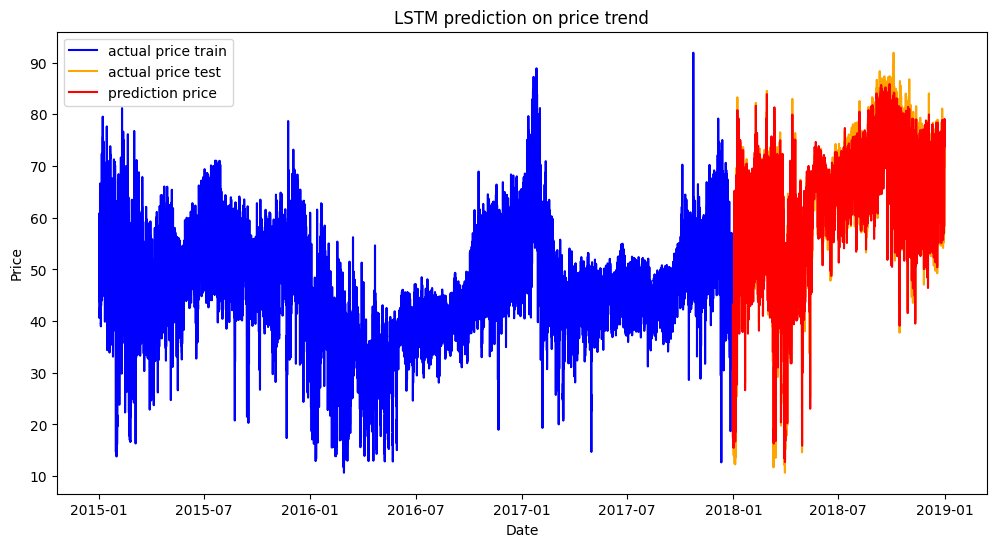

LSTM Root Mean Square Error: 3.7204497732753974
LSTM Mean Squared Error: 2.6564854922724055
LSTM R2 score:0.9092375669079801


In [ ]:
#visualize LSTM prediction result
plt.figure(figsize=(12,6))
plt.plot(X_train1.index, y1_train, label='actual price train', color='blue')
plt.plot(X_test1.index, y1_test, label='actual price test', color='orange')
plt.plot(X_test1.index, lstm_pred1, label='prediction price', color='red')
plt.title('LSTM prediction on price trend')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.show()

#evaluate metrics
Lstm_RMSE = np.sqrt(mean_squared_error(y1_test, lstm_pred1))
Lstm_MAE = mean_absolute_error(y1_test, lstm_pred1)
Lstm_R2 = r2_score(y1_test, lstm_pred1)

print(f"LSTM Root Mean Square Error: {Lstm_RMSE}")
print(f"LSTM Mean Squared Error: {Lstm_MAE}")
print(f"LSTM R2 score:{Lstm_R2}")

based on the evaluation result from the LSTM prediction

the RMSE is around 3.72 which indicate a prediction on average deviate from the actual values. Furthermore, MSE show a 2.65 which indicate that the prediction is highly resemble to the actual value due to low MSE. lastly, R2 shows a 0.91325 which indicate that 90.9% of variance is in the price trend.

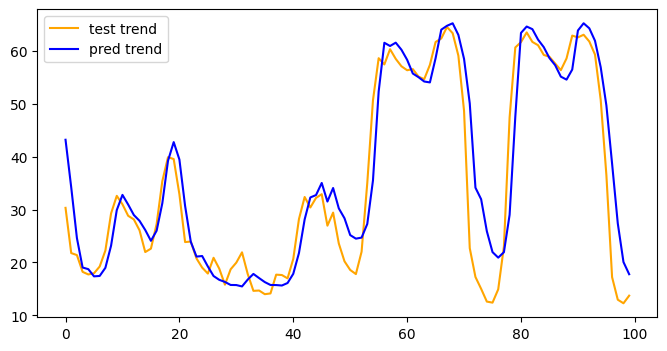

In [ ]:
plt.plot(y1_test[:100], color='orange', label='test trend')
plt.plot(lstm_pred1[:100],color='blue', label='pred trend')
plt.legend()

##Metrics tables

In [ ]:
metrics = pd.DataFrame({
    'Model': ['XGBoost','XGBoost with datetime split','Persistence Baseline','Fold 1','Fold 2','Fold 3','Fold 4','Fold 5','Lstm'],
    'RMSE': [XG_RMSE, train_RMSE ,RMSE_P, error_metrics[0][0], error_metrics[1][0], error_metrics[2][0], error_metrics[3][0], error_metrics[4][0], Lstm_RMSE],
    'MAE': [XG_MAE,train_MAE, MAE_P, error_metrics[0][1], error_metrics[1][1], error_metrics[2][1], error_metrics[3][1], error_metrics[4][1], Lstm_MAE],
    'R2': [XG_R2, train_R2,R2_P, error_metrics[0][2], error_metrics[1][2], error_metrics[2][2], error_metrics[3][2], error_metrics[4][2], Lstm_R2],
})

styletable=metrics.style.set_caption("Model Evaluation Metrics").format(precision=3)\
.set_properties(subset=['Model'], **{'text-align': 'right'})\
.set_properties(subset=[ 'RMSE', 'MAE', 'R2'], **{'text-align': 'center'})

#Print table
styletable


,Model,RMSE,MAE,R2
0,XGBoost,3.020,2.102,0.954
1,XGBoost with datetime split,2.638,1.822,0.954
2,Persistence Baseline,3.661,2.521,0.934
3,Fold 1,3.880,2.938,0.942
4,Fold 2,2.736,2.030,0.952
5,Fold 3,3.623,2.257,0.913
6,Fold 4,3.404,2.306,0.932
7,Fold 5,2.419,1.704,0.916
8,Lstm,3.720,2.656,0.909


Resdual pattern verification

In [ ]:
residuals = y1_test-lstm_pred1

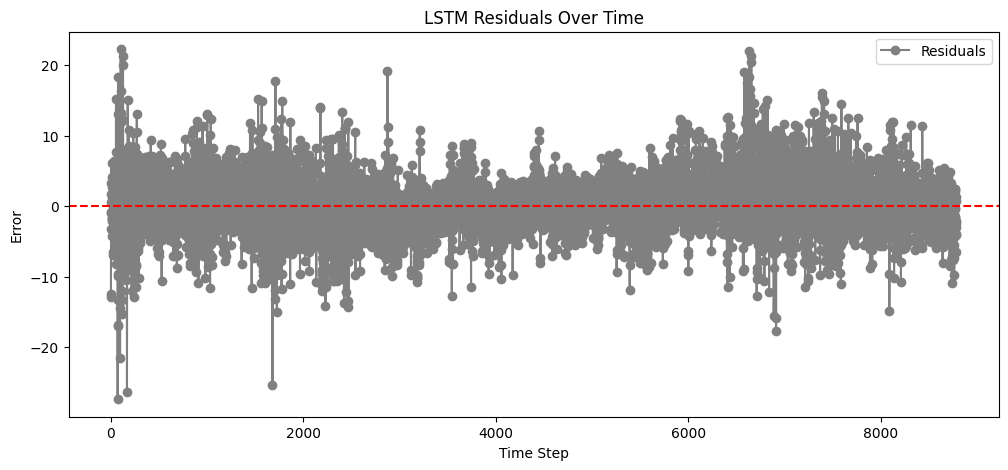

In [ ]:
plt.figure(figsize=(12,5))
plt.plot(residuals, color='gray', marker='o', label='Residuals')
plt.axhline(0, color='red', linestyle='--')
plt.title('LSTM Residuals Over Time')
plt.xlabel('Time Step')
plt.ylabel('Error')
plt.legend()
plt.show()

The residual plot show an uniform pattern that surround the trend line. this shows a good indication of the data is suitable for regression. However the outlier might distrup the model analysis.

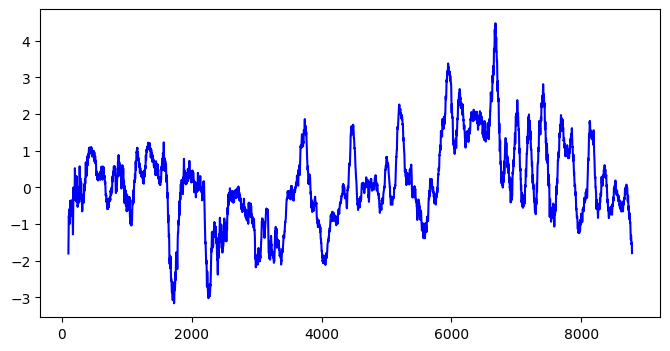

In [ ]:
rolling_mean = pd.Series(residuals.reshape(-1)).rolling(window=100).mean()
plt.plot(rolling_mean, color='blue')

The graph above shows that residual plot with mean value and rolling window size of 100, the y axis range of (-3, 4) shows that the model prediction is not overly off course, the fluctuation trend showed in the graph might indicate that the model not fully capture the seasonality pattern within the data.

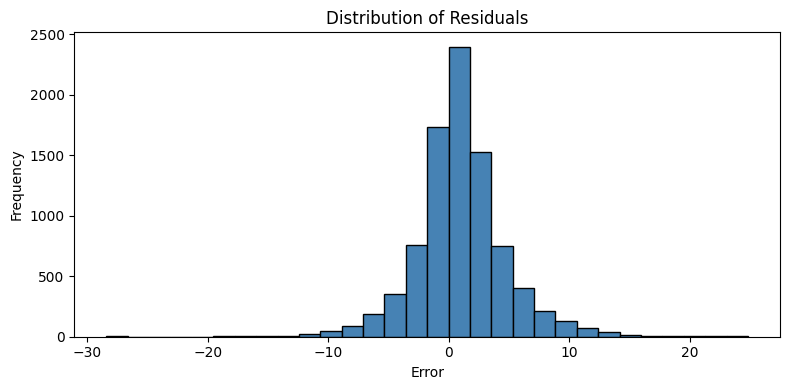

In [ ]:
plt.figure(figsize=(8, 4))
plt.hist(residuals, bins=30, color='steelblue', edgecolor='black')
plt.title('Distribution of Residuals')
plt.xlabel('Error')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


Based on the distribution of residuals show that high frequency of residual are surrounding at 0 and evenly distribute to both side. This indicate that model able to learn high frequency of feature within the data. However the range of the residual are extended from -20 to 20, the high margin present there might be outlier exist.

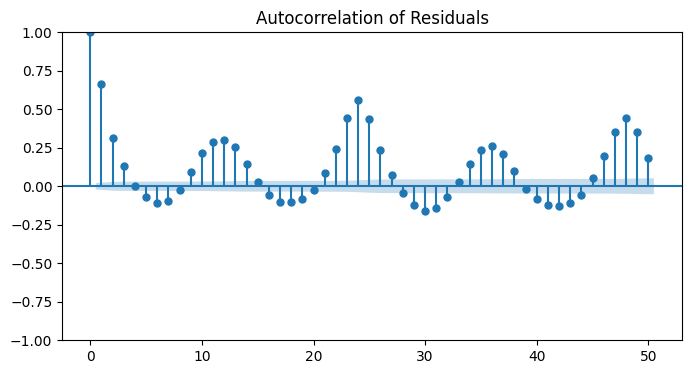

In [ ]:
plot_acf(residuals, lags=50)
plt.title('Autocorrelation of Residuals')
plt.show()


From the Autocorrelation of Residuals, the lag 1,2,3,4 has the highest impact but gradually reduce on the regression model. Furthermode, the pattern of trend shows the cyclical pattern exist in the features.

Lag 1-2 spikes exceed the significant threshold, that suggest short-term autocorrelation. LSTM might be slightly trailing behind recent changes.

the lag past 5 seem to be gradually increase and exceed the threshold, to shows that the model is handling longer-term dependencies well.

#Final Summary

The forecast with LSTM is consider success, the R2 presenting a 90% coefficient which representing a high coverage of variable are in the model analysis. Although the LSTM has lower R2 compare with XGBoost which has 95% but this might due to different model learning capabilites.

Futhermore, looking at the LSTM prediction result. The prediction output highly resemble to the ground truth, eventhough there are slight off from the original but the model is able to study and produce the similar actual output by a deviation of 3.720.

To futher understand the accurancy of the model, residual pattern verification was applied to learn the model. the residual plot shows that the tight range of residual error indicate the model prediction is not off course. However, there are still some value exceed (-10,10), this spike are suspected generated from outliar in the data or the prediction output. Next, looking at the histogram of the residual plot, high frequency are surrounded in between (-10,10). The uniform distribution shows the residual is evenly distributed. Lastly, from the ACF plot we can see that the model is strong in short term prediction because of in lag 1 to 4 shows strong correlation to the target, meanwhile after lag 5 the correlation is exceed the significant threshold the show that the model is decent in long -term prediction as well.

Based on the result from the model, the forecast for energy price trend is consider success. However, there is stil some improvement can be done.
1. increase the useful/importance feature to improve the model prediction efficiency.
2. using different method of data preprocessing to improve the model study efficient.
